# Import Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Dataset Explaination 

<b>work_year</b> : The year the salary was paid.

<b>experience_level</b> : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

<b>employment_type</b> : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

<b>job_title</b> : The role worked in during the year.

<b>salary</b> : The total gross salary amount paid.

<b>salary_currency</b> : The currency of the salary paid as an ISO 4217 currency code.

<b>salary_in_usd</b> : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

<b>employee_residence</b> : Employee's primary country of residence in during the work year as an ISO 3166 country code.

<b>remote_ratio</b> : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

<b>company_location</b> : The country of the employer's main office or contracting branch as an ISO 3166 country code.

<b>company_size</b> : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


# Load Dataset

In [2]:
ds_salary_df = pd.read_csv("./Resources/ds_salaries.csv")
ds_salary_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<AxesSubplot:ylabel='work_year'>

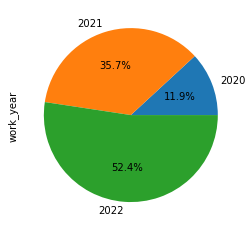

In [3]:
ds_salary_df.groupby('work_year')['work_year'].count().plot.pie(autopct= "%1.1f%%")

In [4]:
ds_salary_df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Observation:
1. Column __Unnamed: 0__ needs to be removed, as it is unnencessary columns.
2. The values of __work_year__ , __salary__ , __salary_in_used__ , __rempte_ratio__ columns are numeric.
3. Almost 52% data are in 2022.

<AxesSubplot:ylabel='salary_currency'>

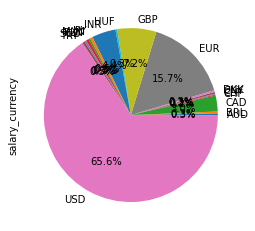

In [5]:
ds_salary_df.groupby('salary_currency')['salary_currency'].count().plot.pie(autopct= "%1.1f%%")

In [6]:
ds_salary_df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

Observation:
1. More than 60% of salary currency is in US Dollar.
2. Second largest salary currency is in EUR.

In [7]:
ds_salary_df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

#### Observation:

1. Top 5 job titles are Data acientist(143) , Data Engineer( 132), Data Analyst(97), Machine Learning Engineer(41) and lastly, Research Scientist(16).

# Data Cleaning and Handling any missing values


In [8]:
# Drop unecessary columns
ds_salary_df = ds_salary_df.drop(columns=['Unnamed: 0'])


In [9]:
ds_salary_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
# Checking and handling missing values
ds_salary_df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
ds_salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [12]:
ds_salary_df.duplicated().sum()

42

There are 42 duplicate , which needs to be dropped.

In [13]:
ds_salary_df[ds_salary_df.duplicated(keep=False)].sort_values('salary_currency').head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
373,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M
443,2022,MI,FT,Data Engineer,60000,GBP,78526,GB,100,GB,M


In [14]:
ds_salary_df[ds_salary_df.duplicated(keep=False)].sort_values('job_title').head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M


In [15]:
ds_salary_df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Observation:
Highest company location for job is in US and second is in GB.

In [16]:
# Drop the duplicate rows
df = ds_salary_df.drop_duplicates()

In [17]:
# Check on the dataset
df.duplicated().sum()

0

In [18]:
# Reset the index
df.reset_index(drop=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
560,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
561,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
562,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
563,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [19]:
# Check any null values
df.isnull().count()

work_year             565
experience_level      565
employment_type       565
job_title             565
salary                565
salary_currency       565
salary_in_usd         565
employee_residence    565
remote_ratio          565
company_location      565
company_size          565
dtype: int64

There are no null values in the dataset.

In [20]:
# Check the unique values.
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

   Here we'll find the unique values in the datasets.

In [21]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [22]:
# Find the counts of different salary currency 
df.groupby('salary_currency')['salary_currency'].count().sort_values(ascending=False)

salary_currency
USD    359
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
DKK      2
BRL      2
HUF      2
MXN      2
SGD      2
AUD      2
CHF      1
CLP      1
Name: salary_currency, dtype: int64

In [23]:
# Salary group by Job title
df[['salary', 'job_title']].sort_values(by=["salary", "job_title"], ascending=False).head(10)

,salary,job_title
177,30400000,Data Scientist
7,11000000,Data Scientist
102,11000000,BI Data Analyst
137,8500000,ML Engineer
136,7000000,ML Engineer
285,7000000,Data Science Manager
384,6000000,Head of Machine Learning
263,4900000,Machine Learning Engineer
16,4450000,Data Engineer
198,4000000,Data Science Manager


In [24]:
# Define the title ( job title):

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'


In [25]:
df['job_simp'] = df['job_title'].apply(title_simplifier)
df.job_simp.value_counts()


C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


data engineer     147
data scientist    146
analyst           104
na                 82
mle                60
manager            19
director            7
Name: job_simp, dtype: int64

The data engineer and data scientist is the highest job title as per salary currency, and then analyst job is the second one.

<AxesSubplot:ylabel='job_title'>

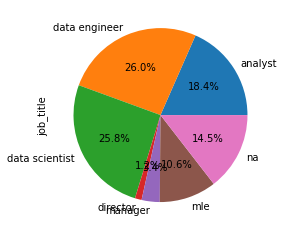

In [26]:
# Create the pie plot visalization according to job title.
df.groupby('job_simp')['job_title'].count().plot.pie(autopct="%1.1f%%")


In [27]:
# Separate colums numerical value and categorical value
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
categorical = list(set(all_columns) - set(numerical))


In [28]:
df[numerical]

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
602,2022,154000,154000,100
603,2022,126000,126000,100
604,2022,129000,129000,0
605,2022,150000,150000,100


In [29]:
df[numerical].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [30]:
df[categorical]

,job_title,company_size,salary_currency,company_location,employment_type,experience_level,employee_residence,job_simp
0,Data Scientist,L,EUR,DE,FT,MI,DE,data scientist
1,Machine Learning Scientist,S,USD,JP,FT,SE,JP,mle
2,Big Data Engineer,M,GBP,GB,FT,SE,GB,data engineer
3,Product Data Analyst,S,USD,HN,FT,MI,HN,analyst
4,Machine Learning Engineer,L,USD,US,FT,SE,US,mle
...,...,...,...,...,...,...,...,...
602,Data Engineer,M,USD,US,FT,SE,US,data engineer
603,Data Engineer,M,USD,US,FT,SE,US,data engineer
604,Data Analyst,M,USD,US,FT,SE,US,analyst
605,Data Analyst,M,USD,US,FT,SE,US,analyst


In [31]:
df[categorical].describe()

,job_title,company_size,salary_currency,company_location,employment_type,experience_level,employee_residence,job_simp
count,565,565,565,565,565,565,565,565
unique,50,3,17,50,4,4,57,7
top,Data Scientist,M,USD,US,FT,SE,US,data engineer
freq,130,290,359,318,546,243,295,147


#  Linear regression Model


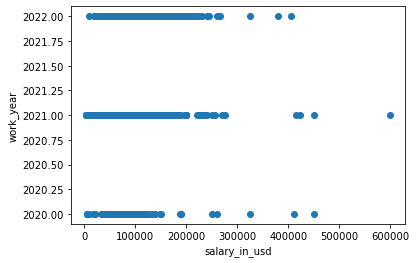

In [32]:
plt.scatter(df.salary_in_usd, df.work_year)
plt.xlabel('salary_in_usd')
plt.ylabel('work_year')
plt.show()


In [33]:
X = df.work_year.values.reshape(-1, 1)


In [34]:
X[:5]

array([[2020],
       [2020],
       [2020],
       [2020],
       [2020]], dtype=int64)

In [35]:
X.shape

(565, 1)

In [36]:
y = df.salary_in_usd

In [37]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [38]:
y_pred = model.predict(X)
print(y_pred.shape)


(565,)


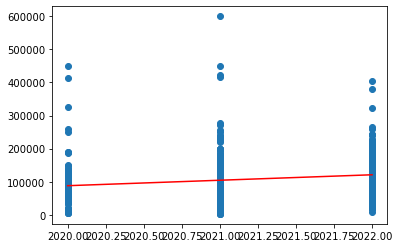

In [39]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [40]:
print(model.coef_)
print(model.intercept_)


[16495.57529263]
-33232961.638995834


# Box-plot Analysis

In [41]:
features = numerical
len(features)


4

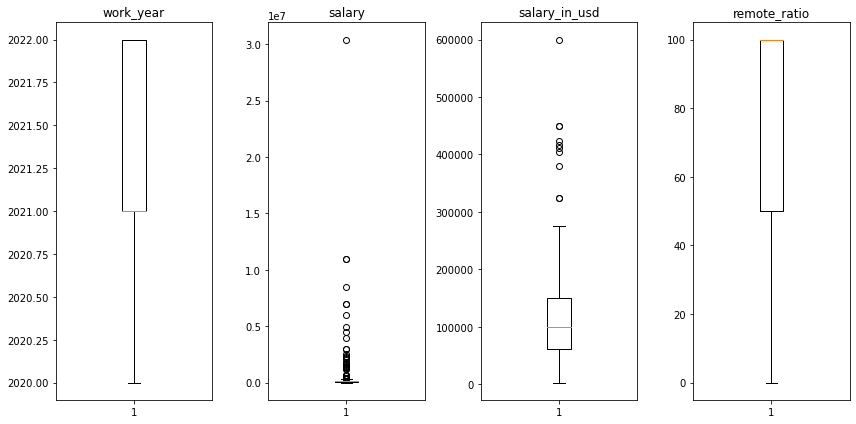

In [42]:
plt.figure(figsize=(12,6))

# create a for-loop for better analysis
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    plt.boxplot(x=df[features[i]])
    plt.tight_layout()
    plt.title(features[i])

Observation:
1. There are no outliers in work_year and remote_ratio columns.
2. There are some outliers in salary and salary_in_usd columns. 

# Split the data to check accuracy

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


In [44]:
# # Generate our categorical variable list
salary_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[salary_cat].nunique()

experience_level       4
employment_type        4
job_title             50
salary_currency       17
employee_residence    57
company_location      50
company_size           3
job_simp               7
dtype: int64

In [45]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[salary_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(salary_cat)
encode_df.head()


C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Scientist,...,company_size_L,company_size_M,company_size_S,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df, left_index=True, right_index=True)
df = df.drop(salary_cat,1)
df.head()

C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_size_L,company_size_M,company_size_S,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na
0,2020,70000,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020,260000,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020,85000,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,20000,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,150000,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# split train test

X = df.drop(columns='work_year')
y = df[['work_year']]

#80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [48]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.2f}")


C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


 Random forest predictive accuracy: 0.67


# Random_Forest_Model 

In [60]:
# split train test

X = df.drop(columns='work_year')
y = df[['work_year']]

# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [61]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [62]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\badri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [63]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([2020, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2020, 2021,
       2021, 2022, 2021, 2022, 2021, 2021, 2022, 2022, 2020, 2021, 2021,
       2020, 2022, 2021, 2022, 2022, 2022, 2021, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2021, 2021, 2022, 2021, 2021, 2021,
       2022, 2021, 2021, 2022, 2021, 2022, 2021, 2022, 2022, 2022, 2022,
       2021, 2021, 2022, 2020, 2021, 2021, 2022, 2022, 2021, 2021, 2022,
       2022, 2020, 2020, 2021, 2021, 2022, 2021, 2022, 2021, 2021, 2022,
       2021, 2022, 2022, 2021, 2021, 2022, 2020, 2022, 2021, 2021, 2021,
       2021, 2022, 2022, 2022, 2022, 2021, 2021, 2021, 2021, 2021, 2021,
       2022, 2021, 2021, 2022, 2020, 2021, 2022, 2022, 2022, 2021, 2022,
       2022, 2022, 2021, 2021, 2022, 2022, 2022, 2021, 2022, 2021, 2021,
       2022, 2022, 2021, 2022, 2021, 2022, 2021, 2022, 2020, 2021, 2020,
       2022, 2022], dtype=int64)

In [65]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"])

cm_df

,Predicted 0,Predicted 1,Predicted 2
Actual 0,3,9,5
Actual 1,7,38,20
Actual 2,1,10,41


In [66]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [67]:
# Displaying results
print("Confusion Matrix")
display(df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_size_L,company_size_M,company_size_S,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na
0,2020,70000,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020,260000,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020,85000,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,20000,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,150000,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022,205300,205300,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
561,2022,184700,184700,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
562,2022,175100,175100,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
563,2022,140250,140250,100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy Score : 0.6119402985074627
Classification Report
              precision    recall  f1-score   support

        2020       0.27      0.18      0.21        17
        2021       0.67      0.58      0.62        65
        2022       0.62      0.79      0.69        52

    accuracy                           0.61       134
   macro avg       0.52      0.52      0.51       134
weighted avg       0.60      0.61      0.60       134



In [68]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([1.09937067e-01, 1.20513073e-01, 4.20707362e-02, 2.34631877e-02,
       4.17397315e-03, 2.28112773e-02, 2.66795058e-02, 2.97993815e-03,
       1.53730082e-03, 5.90444107e-03, 2.13730112e-03, 3.42474854e-04,
       1.31764446e-03, 6.83574084e-04, 4.18149684e-03, 9.31509091e-04,
       6.79764563e-03, 0.00000000e+00, 5.40329404e-03, 3.74570923e-03,
       1.08106229e-03, 1.77240227e-03, 1.21608438e-03, 1.24216506e-02,
       1.31933522e-03, 8.59315740e-04, 2.60058511e-03, 1.13186966e-03,
       1.76200470e-02, 5.30415663e-03, 4.71995997e-03, 1.67513588e-03,
       2.30077255e-03, 1.72186318e-02, 7.80938707e-04, 5.93973140e-04,
       1.77893053e-03, 1.40975542e-04, 4.51517707e-05, 1.41958939e-03,
       1.33372559e-03, 9.08728912e-04, 8.54822267e-04, 2.91351341e-03,
       1.37917879e-03, 1.31198540e-03, 8.52636270e-04, 1.95634315e-03,
       7.31242482e-04, 7.04839363e-03, 2.70332850e-03, 0.00000000e+00,
       5.93542488e-03, 1.93102693e-04, 8.32693921e-04, 4.39867688e-04,
      

In [69]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.12051307337825304, 'salary_in_usd'),
 (0.10993706706920989, 'salary'),
 (0.09623250129955732, 'company_size_M'),
 (0.059843717248031454, 'company_size_L'),
 (0.04207073620548699, 'remote_ratio'),
 (0.026679505785834105, 'experience_level_SE'),
 (0.02429776222772823, 'company_size_S'),
 (0.024155135112165667, 'employee_residence_US'),
 (0.023463187715048555, 'experience_level_EN'),
 (0.022811277257464714, 'experience_level_MI'),
 (0.017620047013875036, 'job_title_Data Engineer'),
 (0.017218631835860393, 'job_title_Data Scientist'),
 (0.015832309782960012, 'job_simp_data scientist'),
 (0.015379294118713149, 'company_location_US'),
 (0.015294555121641157, 'salary_currency_USD'),
 (0.013956340969128227, 'job_simp_data engineer'),
 (0.013527149026037539, 'job_simp_analyst'),
 (0.012421650627292684, 'job_title_Data Analyst'),
 (0.011933355638401696, 'salary_currency_EUR'),
 (0.01154537117774484, 'job_simp_na'),
 (0.010833607494586079, 'job_simp_mle'),
 (0.009107363182363845, 'job_title_R